In [9]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

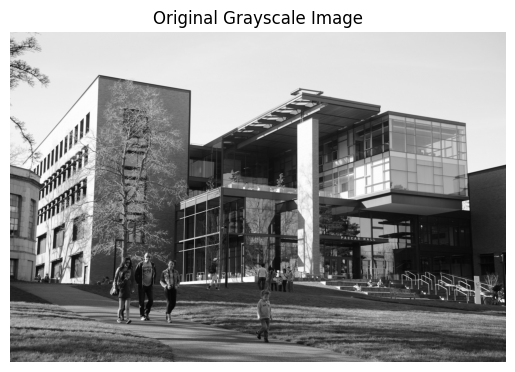

In [10]:
img = cv2.imread('Campus.jpg') # Adjust the path as necessary

if img is None:
	raise FileNotFoundError("Image file not found. Please check the path.")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

#### Analisis Histogram Citra Grayscale Asli

Citra asli dikonversi dari format RGB ke grayscale sehingga setiap piksel direpresentasikan oleh satu nilai intensitas. Histogram citra grayscale menunjukkan distribusi tingkat keabuan pada rentang 0–255. Sebagian besar piksel berada pada intensitas menengah, yang menandakan pencahayaan citra relatif seimbang tanpa dominasi area terlalu gelap atau terlalu terang. Histogram ini digunakan sebagai acuan awal (baseline) untuk membandingkan perubahan distribusi intensitas pada operasi point selanjutnya.

In [11]:
# Create a function to display images
def show_image(image, title="Image"):
	plt.imshow(image, cmap='gray')
	plt.title(title)
	plt.axis('off')
	plt.show()

## Point Operations

Point operations adalah teknik dasar dalam pengolahan citra digital yang melibatkan manipulasi nilai intensitas piksel secara individual tanpa mempertimbangkan piksel tetangga. Operasi ini sering digunakan untuk meningkatkan kualitas citra, menyesuaikan kecerahan dan kontras, serta menerapkan efek khusus. Berikut adalah beberapa operasi titik umum yang sering digunakan dalam pengolahan citra:
1. Brightness Adjustment
2. Contrast Adjustment
3. Negative / Inversion
4. Thresholding
5. Gamma Correction

### 1. Brightness Adjustment
**Konsep:**
Brightness adjustment adalah operasi point yang menambahkan atau mengurangi nilai konstanta pada setiap piksel dalam citra. Operasi ini menggeser histogram ke kanan (lebih terang) atau ke kiri (lebih gelap) tanpa mengubah bentuk distribusinya.

**Implementasi:**
```python
bright = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=50)
dark = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=-50)
```

**Parameter:**
- `alpha=1.0`: Faktor skala tetap (tidak mengubah kontras)
- `beta=50`: Menambahkan 50 pada setiap nilai piksel (mencerahkan)
- `beta=-50`: Mengurangi 50 dari setiap nilai piksel (menggelapkan)

**Formula Matematis:**
```
Output = Input + beta
Brightened = I(x,y) + 50
Darkened = I(x,y) - 50
```

**Catatan:** Fungsi `convertScaleAbs()` secara otomatis memastikan nilai tetap dalam rentang [0, 255] dengan clipping.

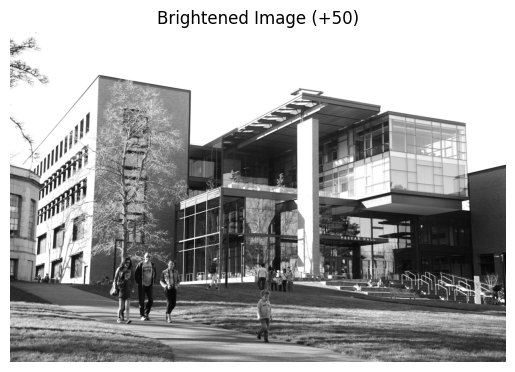

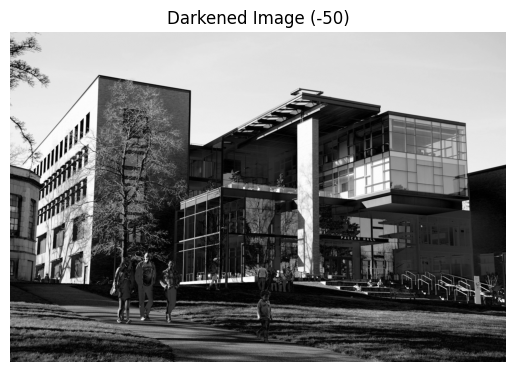

In [12]:
bright = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=50)
dark = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=-50)
show_image(bright, "Brightened Image (+50)")
show_image(dark, "Darkened Image (-50)")

#### Analisis Histogram Penerapan Brightness Adjustment pada Citra Grayscale

Citra hasil brightness adjustment menunjukkan perubahan tingkat kecerahan dengan menambahkan dan mengurangi nilai intensitas pada setiap piksel. Citra yang diperterang (+50) tampak lebih cerah sehingga detail pada area gelap lebih terlihat, sedangkan citra yang digelapkan (−50) tampak lebih gelap dan mengurangi kejelasan detail. Operasi ini hanya mempengaruhi nilai intensitas piksel tanpa mengubah struktur objek pada citra.

### 2. Contrast Adjustment
**Konsep:**
Contrast adjustment mengubah rentang intensitas piksel dengan mengalikan nilai piksel dengan faktor skala (alpha). Nilai kontras yang tinggi memperbesar perbedaan antara area terang dan gelap, sedangkan nilai yang rendah mengurangi perbedaan tersebut.

**Implementasi:**
```python
low_contrast = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=128)
normal_contrast = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=0)
high_contrast = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)
```

**Parameter:**
- **Low Contrast**: `alpha=0.5, beta=128`
  - Mengurangi rentang intensitas menjadi setengahnya
  - Beta=128 untuk mempertahankan nilai tengah agar tidak terlalu gelap
  
- **Normal Contrast**: `alpha=1.0, beta=0`
  - Mempertahankan citra asli tanpa perubahan
  
- **High Contrast**: `alpha=1.5, beta=0`
  - Memperluas rentang intensitas 1.5x lipat
  - Memperjelas detail dan tepi objek

**Formula Matematis:**
```
Output = alpha × Input + beta
Low: I'(x,y) = 0.5 × I(x,y) + 128
High: I'(x,y) = 1.5 × I(x,y)
```

**Efek pada Histogram:**
- Low contrast: Histogram menyempit dan terpusat
- High contrast: Histogram melebar ke arah ekstrem (0 dan 255)

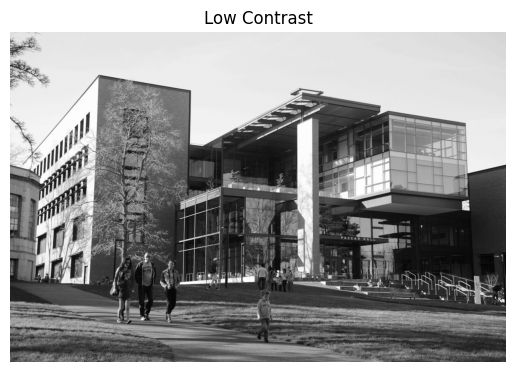

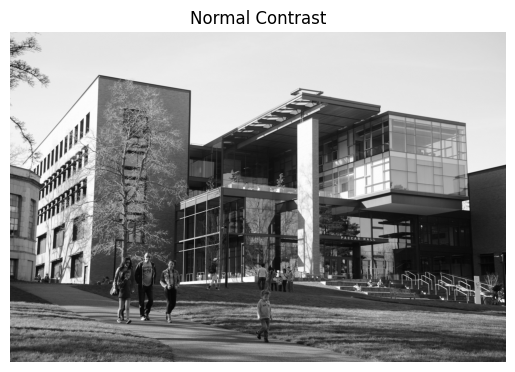

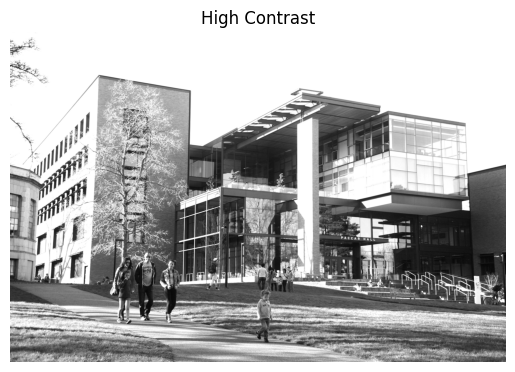

In [13]:
low_contrast = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=128)
normal_contrast = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=0)
high_contrast = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)
show_image(low_contrast, "Low Contrast")
show_image(normal_contrast, "Normal Contrast")
show_image(high_contrast, "High Contrast")


#### Analisis Histogram Penerapan Contrast Adjustment pada Citra Grayscale

Operasi contrast dilakukan dengan mengubah nilai skala (α) pada setiap piksel citra grayscale. Pada citra low contrast (α = 0,5), histogram menyempit dan cenderung terkonsentrasi di sekitar intensitas menengah, yang menyebabkan perbedaan antar piksel menjadi kecil sehingga citra tampak lebih pudar. Citra normal contrast (α = 1,0) mempertahankan distribusi intensitas asli tanpa perubahan signifikan. Sementara itu, pada citra high contrast (α = 1,5), histogram melebar ke arah intensitas rendah dan tinggi, yang meningkatkan perbedaan antar piksel sehingga detail visual tampak lebih jelas, meskipun berpotensi menimbulkan clipping pada nilai ekstrem.

### 3. Negative / Inversion

**Konsep:**
Image inversion menciptakan efek negatif fotografis dengan membalik nilai intensitas setiap piksel. Piksel gelap menjadi terang dan sebaliknya. Operasi ini berguna untuk analisis medis (X-ray) atau efek artistik.

**Implementasi:**
```python
negative = 255 - img_gray
```

**Formula Matematis:**
```
Output = MAX_VALUE - Input
I'(x,y) = 255 - I(x,y)
```

**Contoh Transformasi:**
- Piksel dengan nilai 0 (hitam) → 255 (putih)
- Piksel dengan nilai 255 (putih) → 0 (hitam)
- Piksel dengan nilai 128 (abu-abu) → 127 (abu-abu)

**Karakteristik:**
- Operasi sederhana dan cepat (hanya subtraksi)
- Tidak mengubah informasi struktural citra
- Histogram terbalik (mirror) terhadap nilai tengah (127.5)

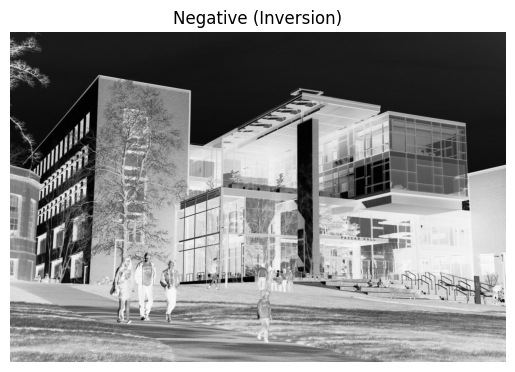

In [14]:
negative = 255 - img_gray
show_image(negative, "Negative (Inversion)")

#### Analisis Histogram Penerapan Negative / Inversion pada Citra Grayscale

Citra hasil operasi negative / inversion diperoleh dengan membalik nilai intensitas piksel, sehingga area terang menjadi gelap dan area gelap menjadi terang. Operasi ini menghasilkan perubahan visual yang kontras tanpa mengubah struktur objek pada citra. Inversi intensitas ini berguna untuk menonjolkan detail tertentu yang kurang terlihat pada citra asli, terutama pada area dengan pencahayaan rendah.

### 4. Thresholding
**Konsep:**
Thresholding mengubah citra grayscale menjadi citra biner (hitam-putih) berdasarkan nilai ambang (threshold). Piksel dengan intensitas di atas threshold menjadi putih (255), dan di bawahnya menjadi hitam (0).

**Implementasi:**
```python
_, binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
```

**Parameter:**
- `img_gray`: Citra grayscale input
- `128`: Nilai threshold (ambang batas)
- `255`: Nilai maksimum untuk piksel di atas threshold
- `cv2.THRESH_BINARY`: Jenis thresholding biner

**Formula Matematis:**
```
I'(x,y) = { 255  if I(x,y) > 128
          { 0    if I(x,y) ≤ 128
```

**Kegunaan:**
- Segmentasi objek dari latar belakang
- Deteksi tepi dan kontur
- Preprocessing untuk OCR (Optical Character Recognition)
- Analisis citra biner

**Return Value:**
- Nilai pertama (`_`): Threshold value yang digunakan (diabaikan dalam kasus ini)
- `binary`: Citra biner hasil thresholding

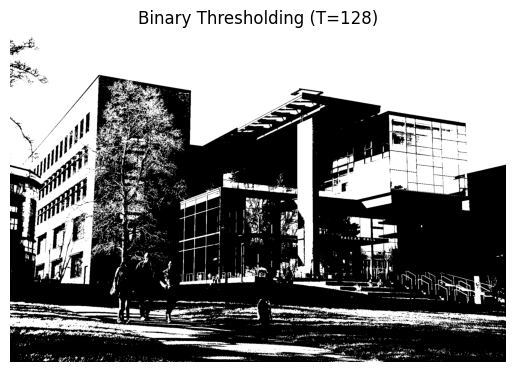

In [15]:
_, binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
show_image(binary, "Binary Thresholding (T=128)")

#### Analisis Histogram Penerapan Thresholding pada Citra Grayscale

Operasi binary thresholding dilakukan dengan membandingkan setiap nilai intensitas piksel terhadap nilai ambang (T = 128). Piksel dengan intensitas di atas ambang diubah menjadi putih (255), sedangkan piksel di bawah ambang diubah menjadi hitam (0). Akibatnya, histogram citra menjadi terpolarisasi dengan dua puncak utama pada nilai 0 dan 255, yang menunjukkan hilangnya variasi gradasi intensitas. Operasi ini menyederhanakan citra menjadi dua kelas utama, yaitu foreground dan background, sehingga cocok untuk segmentasi sederhana namun mengorbankan detail visual citra.

### 5. Gamma Correction

**Konsep:**
Gamma correction adalah transformasi non-linear yang menyesuaikan kecerahan citra dengan mempertimbangkan persepsi visual manusia. Berbeda dengan brightness adjustment linear, gamma correction mempengaruhi mid-tones lebih signifikan daripada nilai ekstrem.

**Implementasi:**
```python
def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i/255.0)**invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

gamma_dark = gamma_correction(img_gray, 2.2)   # gamma > 1 darkens
gamma_light = gamma_correction(img_gray, 0.5)  # gamma < 1 brightens
```

**Formula Matematis:**
```
Output = 255 × (Input/255)^(1/gamma)
```

**Parameter Gamma:**
- **gamma > 1** (misalnya 2.2): Menggelapkan citra
  - Mid-tones menjadi lebih gelap
  - Meningkatkan kontras pada area terang
  
- **gamma < 1** (misalnya 0.5): Mencerahkan citra
  - Mid-tones menjadi lebih terang
  - Meningkatkan detail pada area gelap
  
- **gamma = 1**: Tidak ada perubahan (linear)

**Teknik Lookup Table (LUT):**
- Membuat tabel 256 nilai yang sudah terkoreksi gamma
- Fungsi `cv2.LUT()` memetakan setiap piksel ke nilai baru menggunakan tabel
- Efisien untuk operasi real-time karena hanya melakukan lookup, bukan kalkulasi

**Kegunaan:**
- Koreksi tampilan citra untuk berbagai perangkat (monitor, printer)
- Meningkatkan visibilitas detail pada area gelap atau terang
- Preprocessing untuk computer vision dan machine learning
- Simulasi kondisi pencahayaan berbeda

**Perbedaan dengan Brightness Adjustment:**
- Brightness: Transformasi linear (menambah/kurangi konstanta)
- Gamma: Transformasi non-linear (mengubah distribusi intensitas secara proporsional)

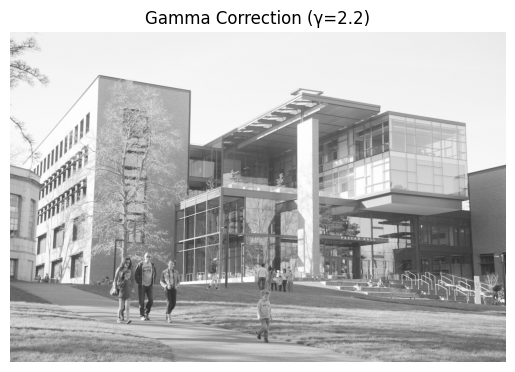

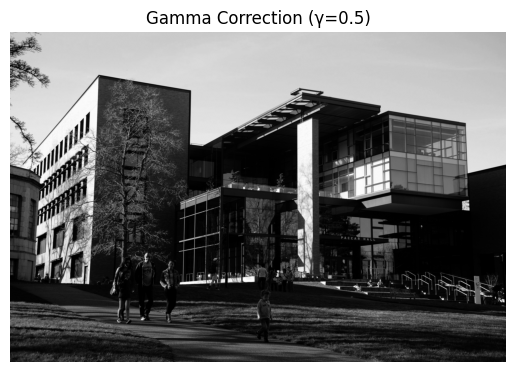

In [16]:
def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i/255.0)**invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

gamma_dark = gamma_correction(img_gray, 2.2)   # gamma > 1 darkens
gamma_light = gamma_correction(img_gray, 0.5)  # gamma < 1 brightens

show_image(gamma_dark, "Gamma Correction (γ=2.2)")
show_image(gamma_light, "Gamma Correction (γ=0.5)")

#### Analisis Histogram Penerapan Gamma Correction pada Citra Grayscale

Citra hasil gamma correction menunjukkan perubahan kecerahan secara non-linear terhadap nilai intensitas piksel. Pada citra dengan γ = 2.2, citra tampak lebih gelap karena intensitas rendah ditekan, sehingga detail pada area gelap menjadi kurang terlihat. Sebaliknya, pada citra dengan γ = 0.5, citra tampak lebih terang karena intensitas rendah diperkuat, sehingga detail pada area gelap menjadi lebih jelas. Operasi ini berguna untuk menyesuaikan tampilan citra sesuai karakteristik pencahayaan dan perangkat tampilan.

#### Kesimpulan

Berdasarkan hasil pengolahan citra menggunakan point operations, dapat disimpulkan bahwa setiap operasi memberikan pengaruh langsung terhadap nilai intensitas piksel tanpa mengubah struktur objek pada citra. Brightness adjustment memengaruhi tingkat kecerahan citra dengan menggeser distribusi intensitas, contrast adjustment mengubah perbedaan antara area terang dan gelap, negative/inversion membalik nilai intensitas untuk menonjolkan detail tertentu, thresholding menyederhanakan citra menjadi bentuk biner, dan gamma correction menyesuaikan kecerahan secara non-linear. Analisis histogram pada setiap tahap menunjukkan perubahan distribusi intensitas yang jelas, sehingga citra grayscale asli berperan sebagai acuan (baseline) dalam mengevaluasi dampak masing-masing operasi.